<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <table>
                    <tr>
                        <td>
                            <img src="https://www.irises.org/wp-content/uploads/2019/04/DSC_0212-1-2.jpg" style="max-width: 60px; display: block;">
                        </td>
                        <td>
                            <font color="darkviolet" size="5px">
                                <b>Iris species classification
</b>
                            </font>
                        </td>
                    </tr>
                </table>
            </div>
            <p style="text-align:center; margin-top: 10px;">
                <span style="color: purple;">Copyright (©)  Vengatesan-K. All Rights Reserved.</span>
            </p>
        </td>
    </tr>
</table>


***

> Iris Dataset, and it contains features of different flower species. Independent features in this dataset are Sepal Length, Sepal Width, Petal Length, and Petal Width. All these lengths were in centimeters. And Dependent feature, which will be the output for the model, is Species. It contains the name of the species to which that particular flower with those measurements belongs.

<img src="https://miro.medium.com/v2/resize:fit:1000/1*Hh53mOF4Xy4eORjLilKOwA.png" />

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*H2UmG5L1I5bzFCW006N5Ag.png" />

> In fact, three of these iris species look similar, but the difference in measurements can be used to classify them. This data set is a classic example of supervised learning. The input variables are sepal length and width and petal length and width; each row represents an instance or observation. The output variable is Iris-setosa, Iris-versicolor, or Iris-virginica; each column represents a class label.

<hr>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plot
from sklearn.datasets import load_iris
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)
from scipy import stats
from statsmodels.api import qqplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm 
from sklearn import metrics
import sklearn
import pickle as pkl

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Vengatesan-K/Iris-Species/main/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<span style="color: darkviolet; font-weight: bold; font-family:Comic Sans MS; font-size: 18px; text-decoration: underline;">The variables are :</span>

<table style="width:200%">
<table>
<thead>
<tr><th>Attribute</th><th>Detail</th><th>Input/Target</th></tr>
</thead>
<tbody>
<tr><td>sepal_length</td><td>Sepal length, in centimeters</td><td>used as input</td></tr>
<tr><td>sepal_width</td><td>Sepal width, in centimeters</td><td>used as input</td></tr>
<tr><td>petal_length</td><td>Petal length, in centimeters</td><td>used as input</td></tr>
<tr><td>petal_width</td><td>Petal width, in centimeters</td><td>used as input</td></tr>
<tr><td>class</td><td> Iris Setosa, Versicolor, or Virginica</td><td>used as the target</td></tr>
</tbody>
</table>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  300 non-null    float64
 1   sepal_width   300 non-null    float64
 2   petal_length  300 non-null    float64
 3   petal_width   300 non-null    float64
 4   species       300 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.8+ KB


In [7]:
df.shape

(300, 5)

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#import missingno as msno
#msno.matrix(df)

In [9]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df_iris = df.drop_duplicates()

In [11]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.0,5.843624,0.830851,4.3,5.1,5.8,6.4,7.9
sepal_width,149.0,3.059732,0.436342,2.0,2.8,3.0,3.3,4.4
petal_length,149.0,3.748993,1.767791,1.0,1.6,4.3,5.1,6.9
petal_width,149.0,1.194631,0.762622,0.1,0.3,1.3,1.8,2.5


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

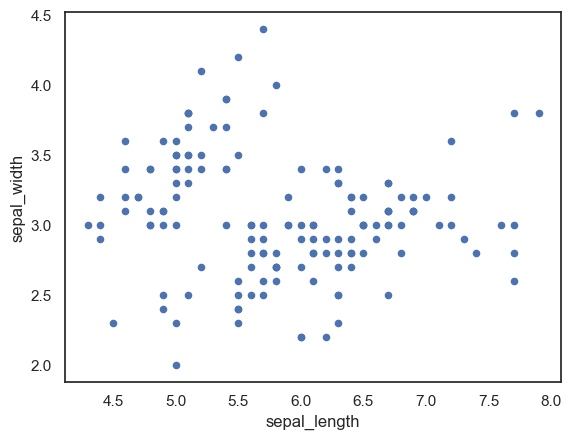

In [13]:
df_iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

In [14]:
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df_iris[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df_iris[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df_iris[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

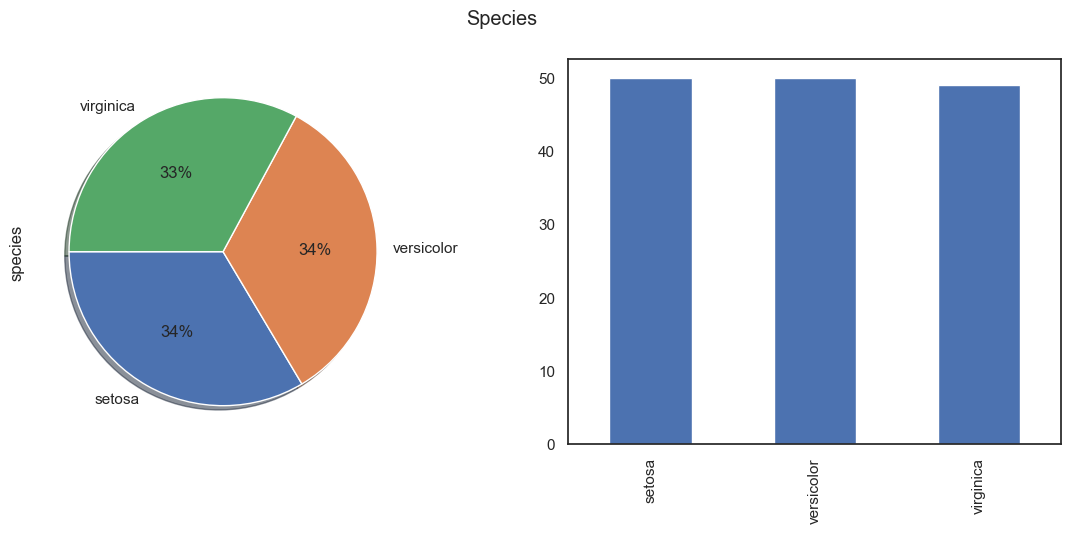

In [15]:
plot_categorial('species')

In [16]:
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df_iris, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df_iris[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df_iris, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df_iris, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

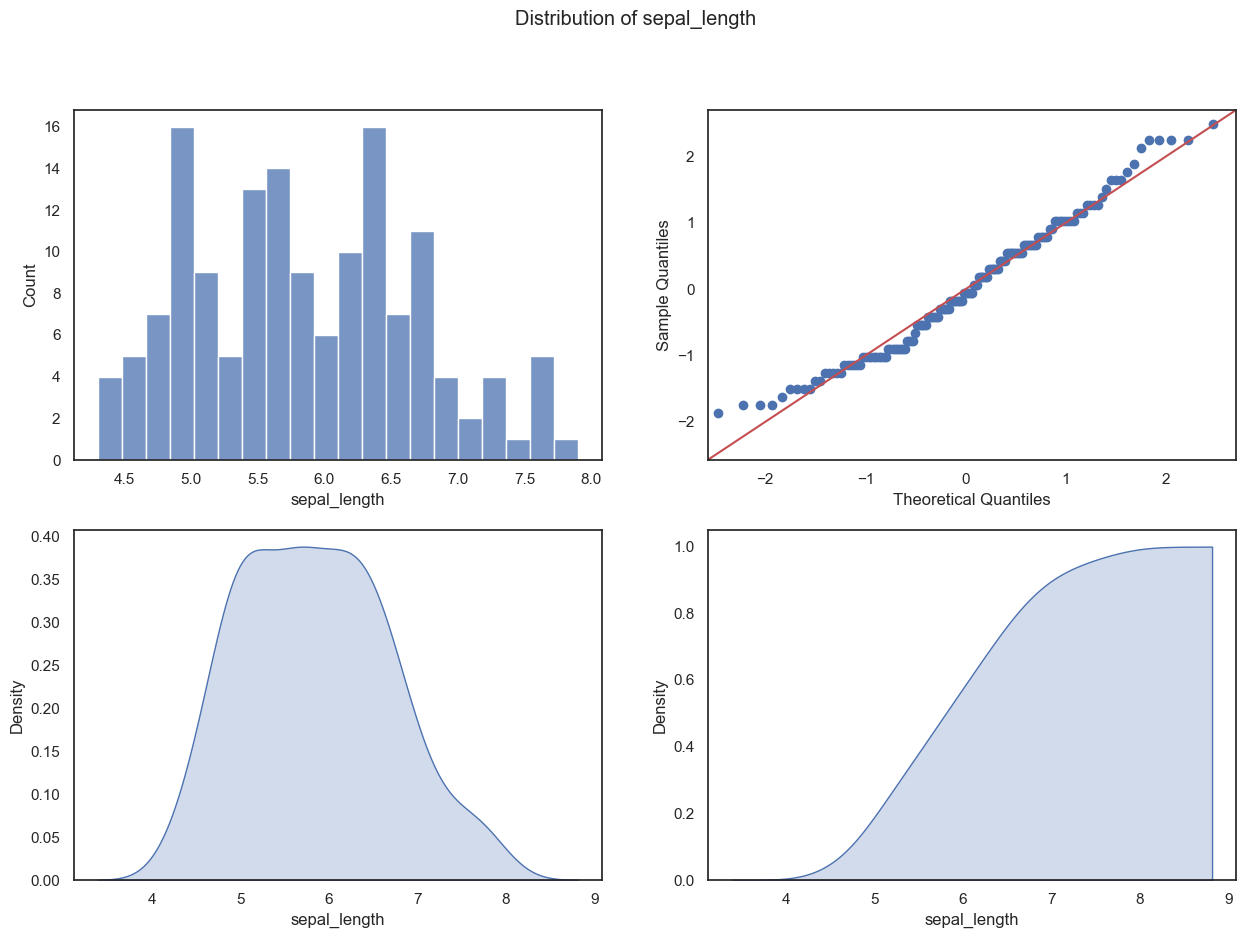

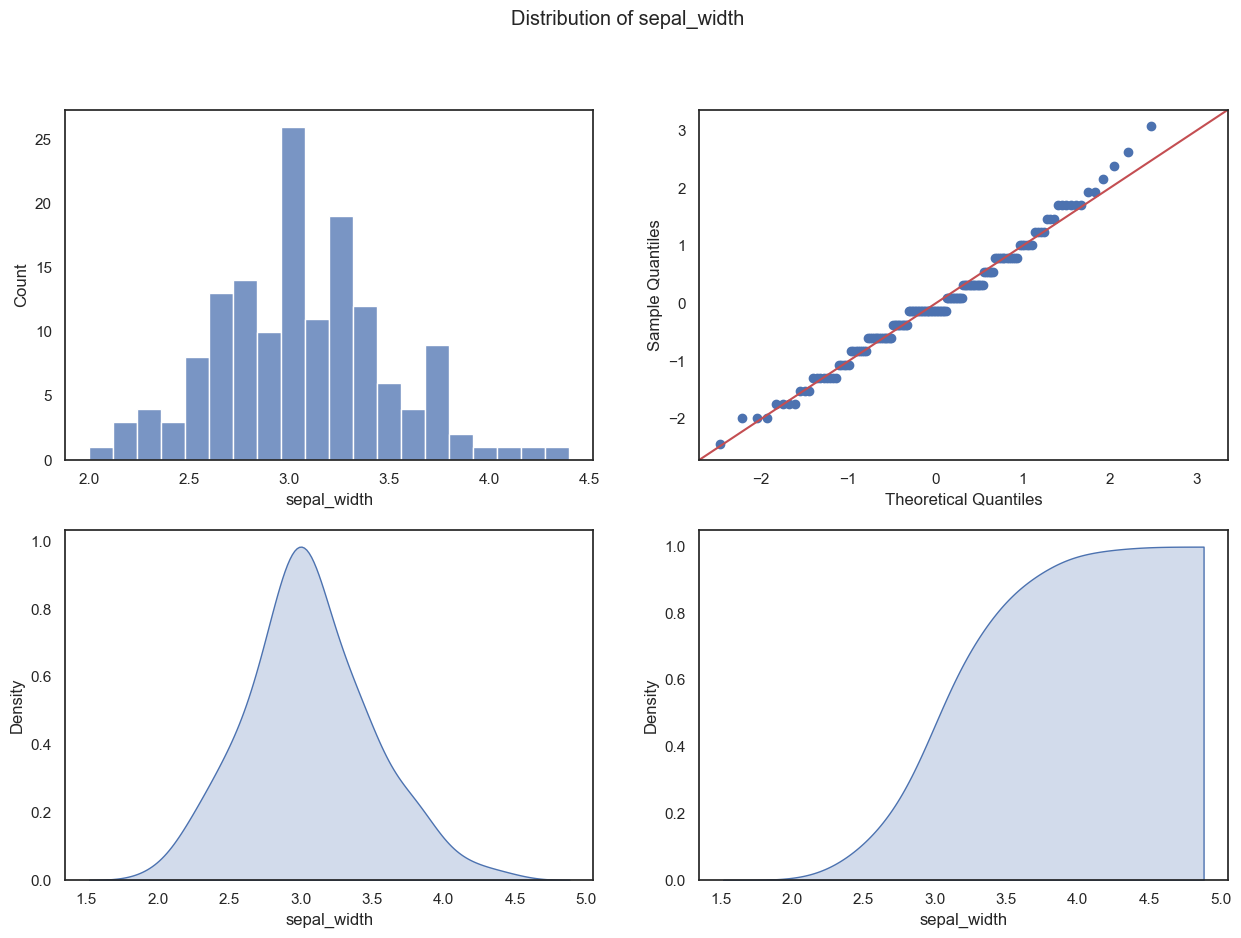

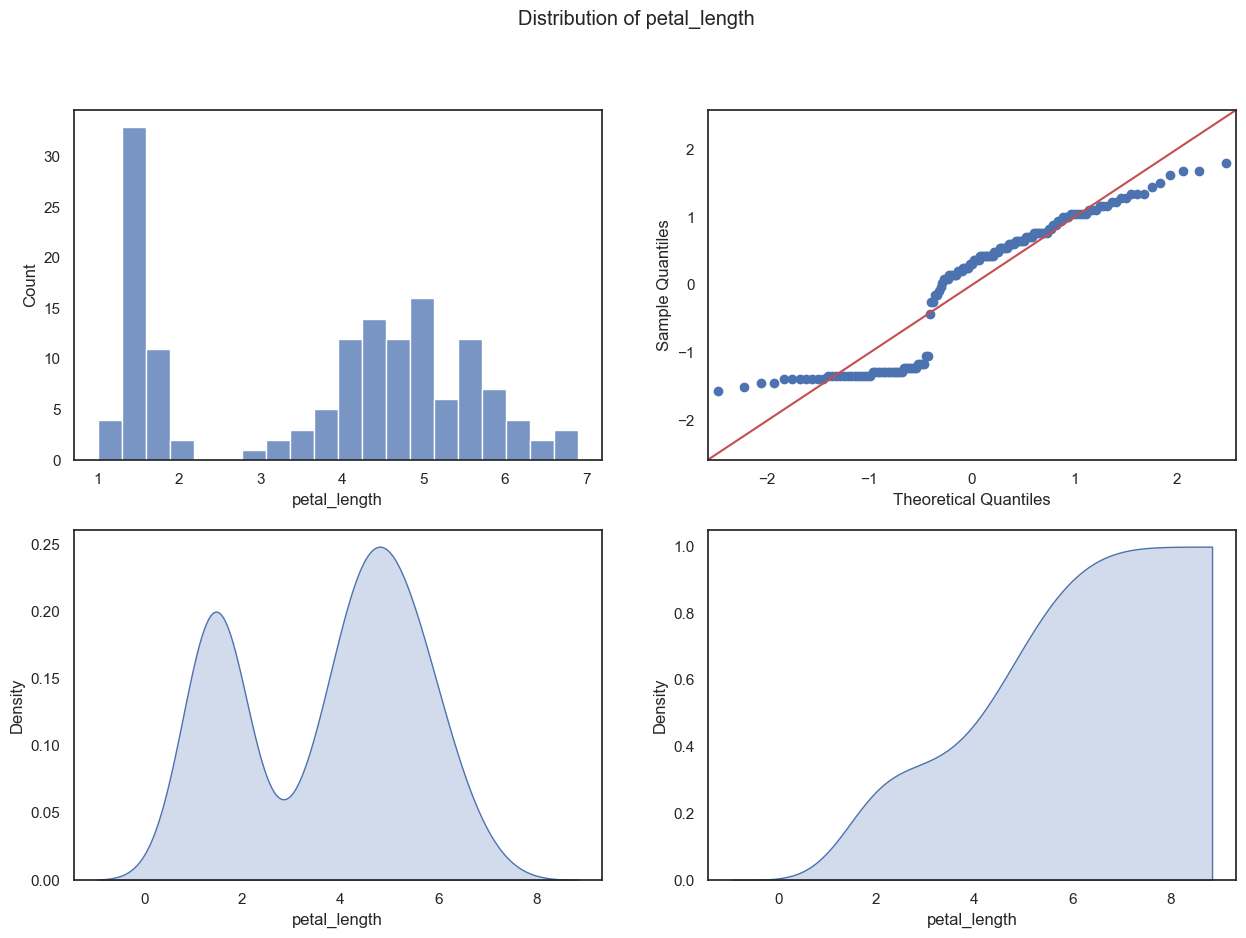

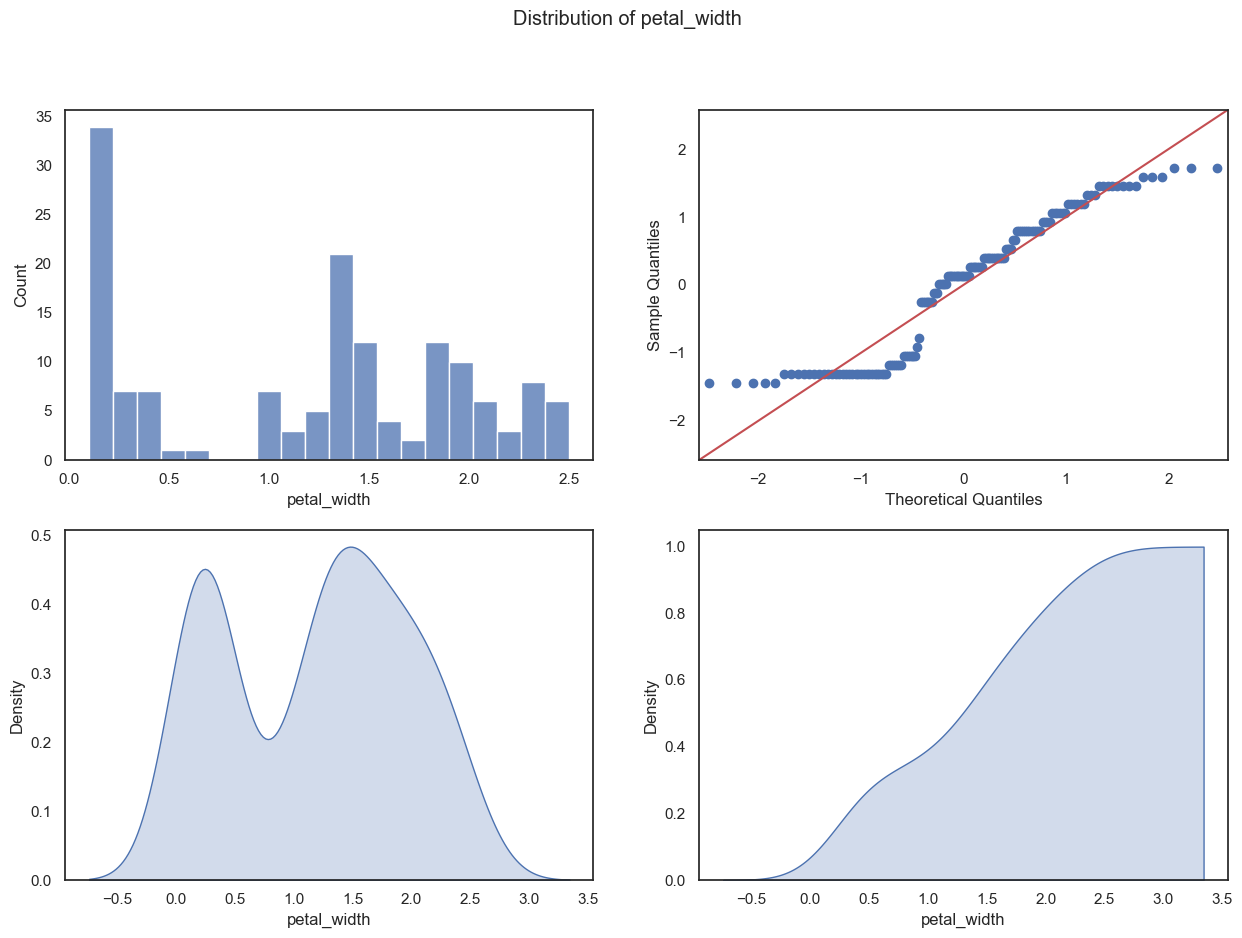

In [17]:
plot_distribution('sepal_length')
plot_distribution('sepal_width')
plot_distribution('petal_length')
plot_distribution('petal_width')

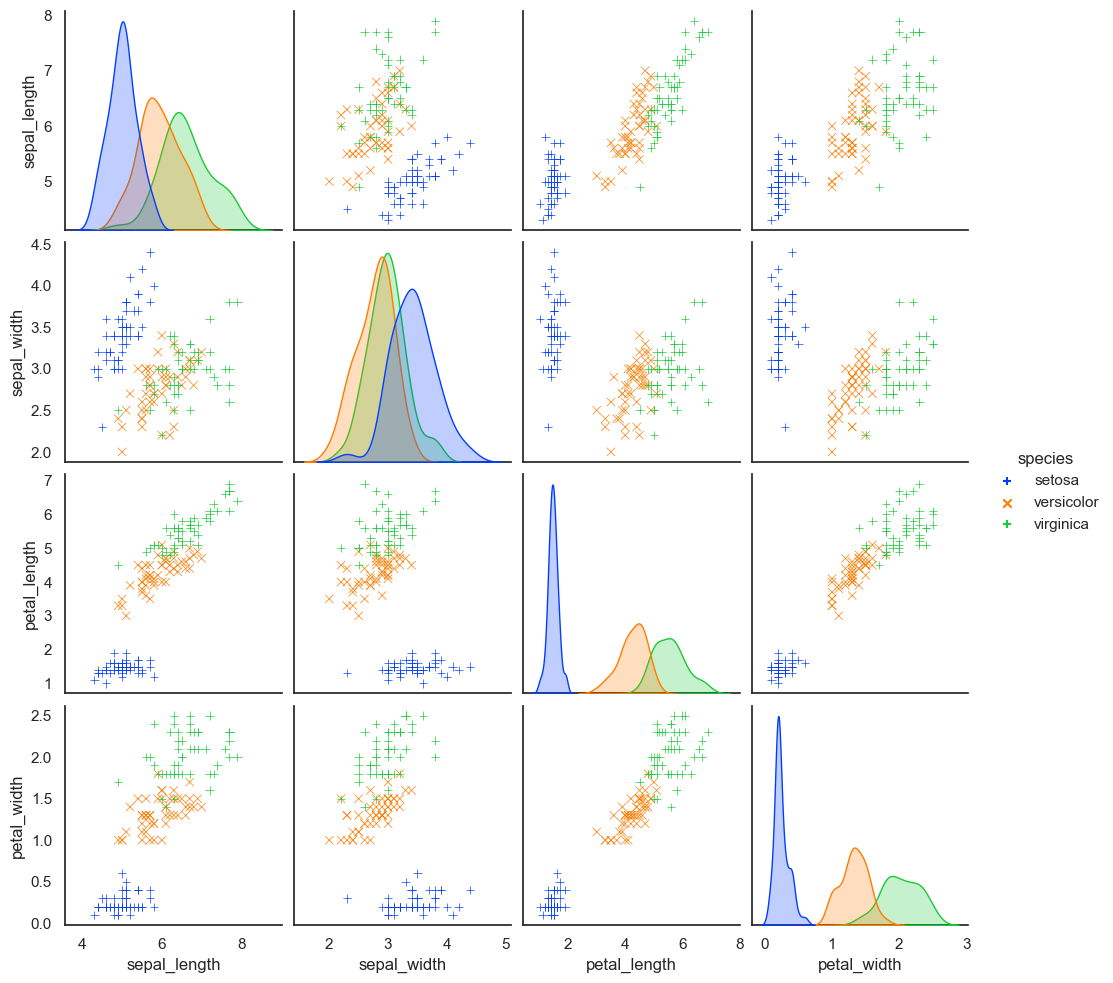

In [18]:
continuous = ["sepal_length","sepal_width","petal_length","petal_width"]
sns.pairplot(
    df_iris,
    hue="species",
    x_vars=continuous,
    markers=["+", "x"],
    palette="bright",
)

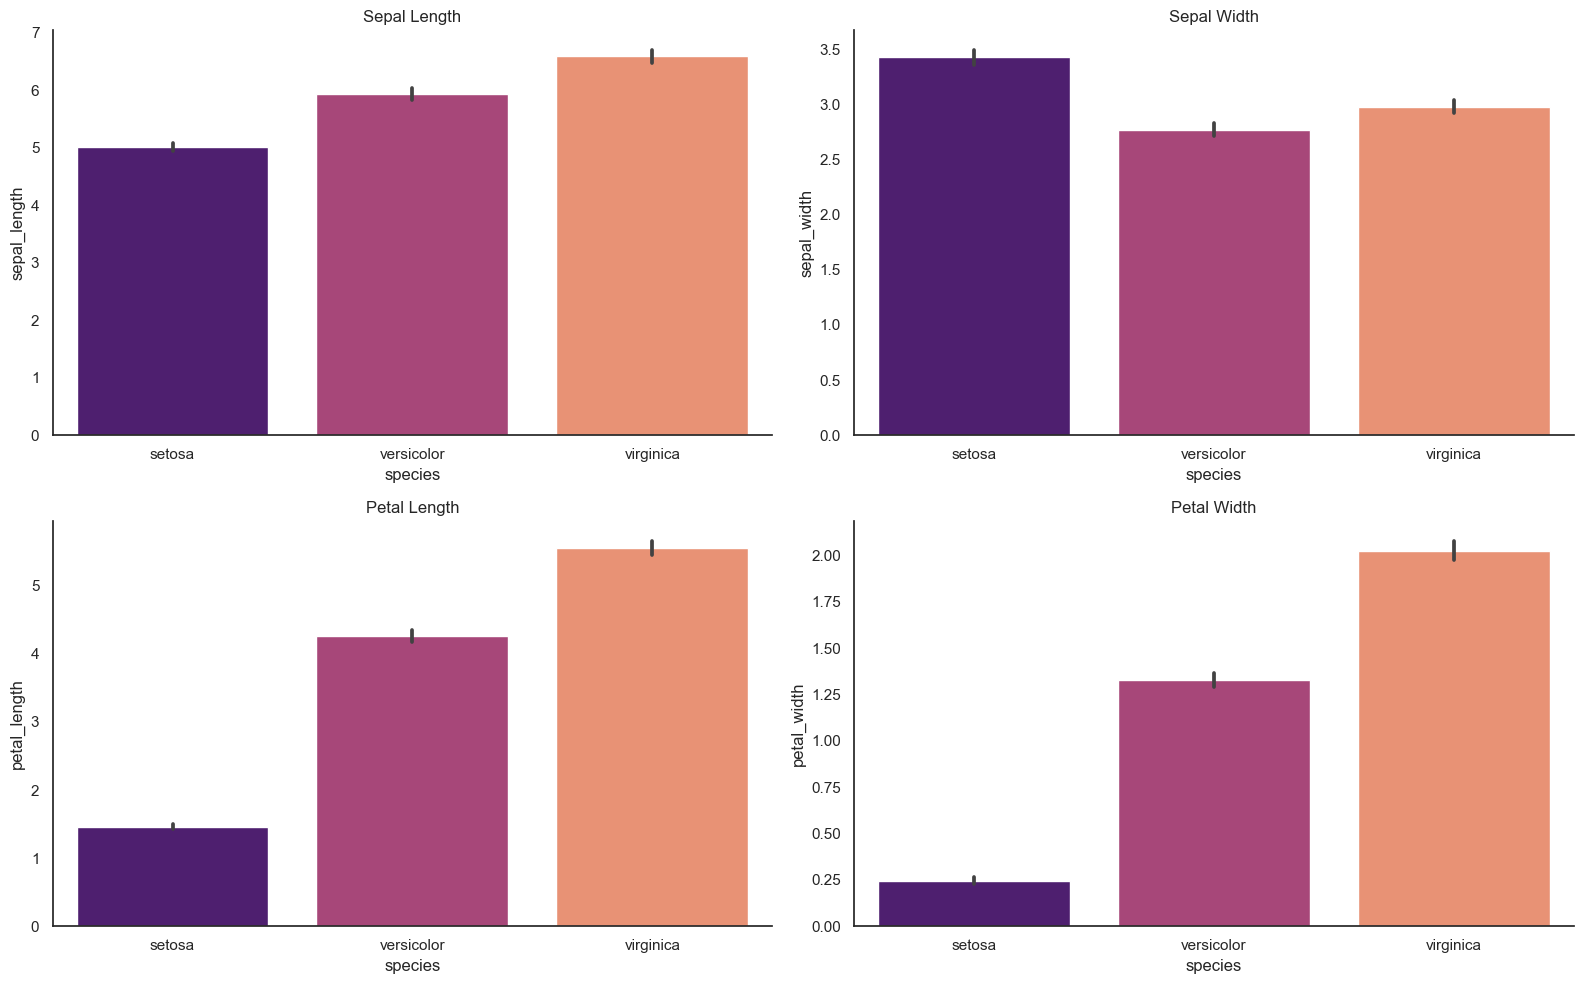

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns

sns.barplot(x='species', y='sepal_length', data=df, palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')
sns.despine(ax=axes[0, 0])

sns.barplot(x='species', y='sepal_width', data=df, palette='magma', ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')
sns.despine(ax=axes[0, 1])

sns.barplot(x='species', y='petal_length', data=df, palette='magma', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')
sns.despine(ax=axes[1, 0])

sns.barplot(x='species', y='petal_width', data=df, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')
sns.despine(ax=axes[1, 1])

plt.tight_layout()
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

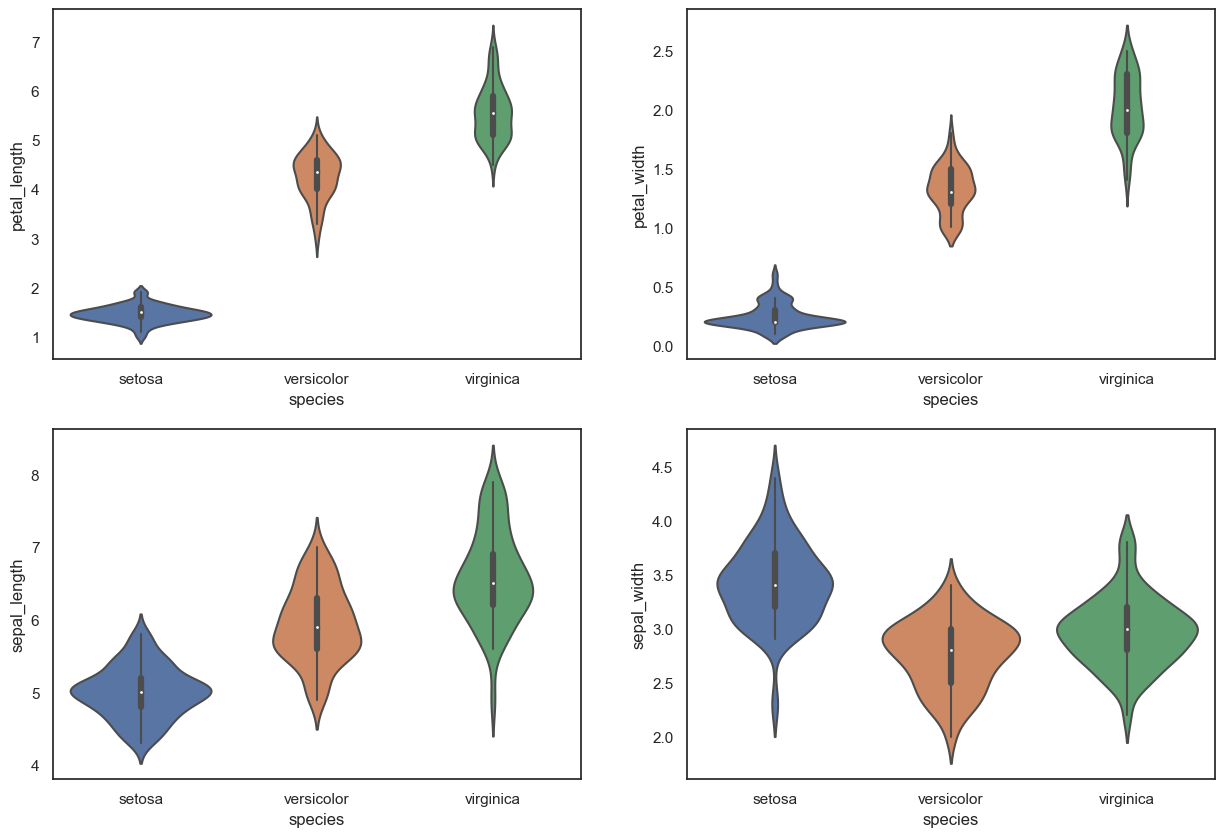

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_iris['species'] = label_encoder.fit_transform(df_iris['species'])

In [20]:
df_iris['species'].unique()

array([0, 1, 2])

> - 0 = 'setosa'
> 
> - 1 = 'versisolor'
> 
> - 2 = 'virginica'

In [64]:
corr = df_iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
species,0.786971,-0.422987,0.949402,0.956514,1.000000


<Axes: >

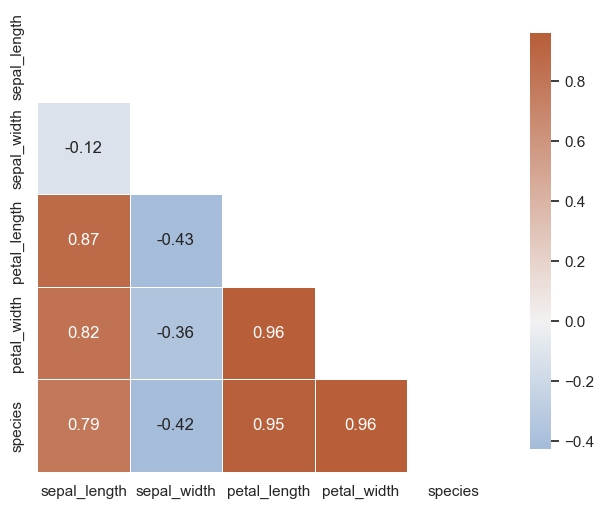

In [65]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

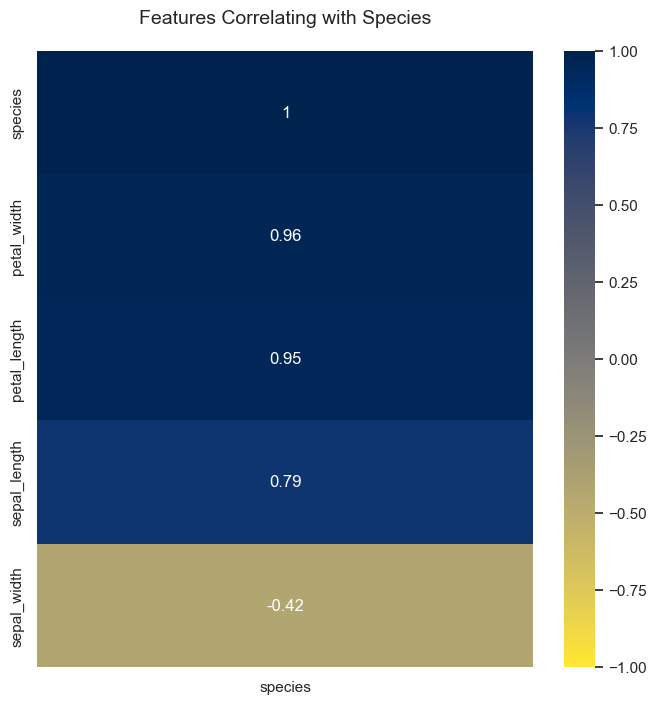

In [66]:
plt.figure(figsize=(8, 8))

heatmap = sns.heatmap(
    corr[["species"]].sort_values(by="species", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="cividis_r",
)  
heatmap.set_title(
    "Features Correlating with Species",
    fontdict={"fontsize": 14},
    pad=20,  
)
plt.show()

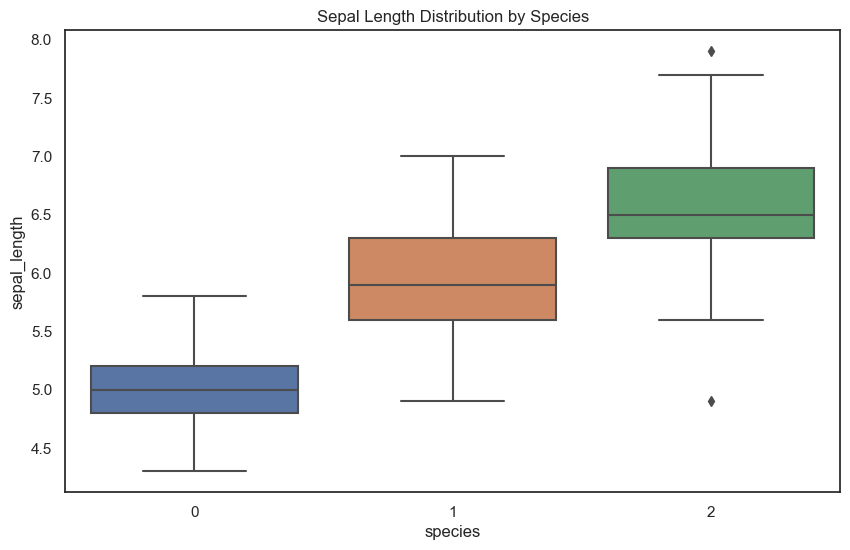

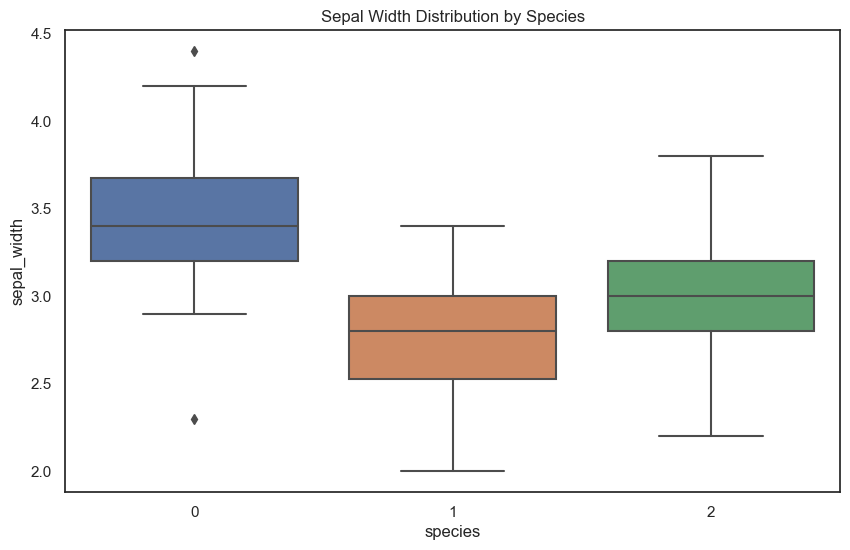

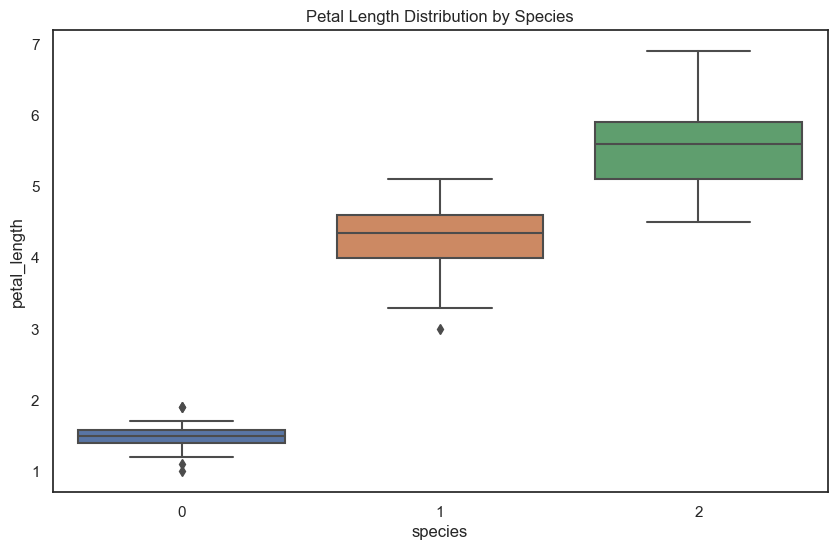

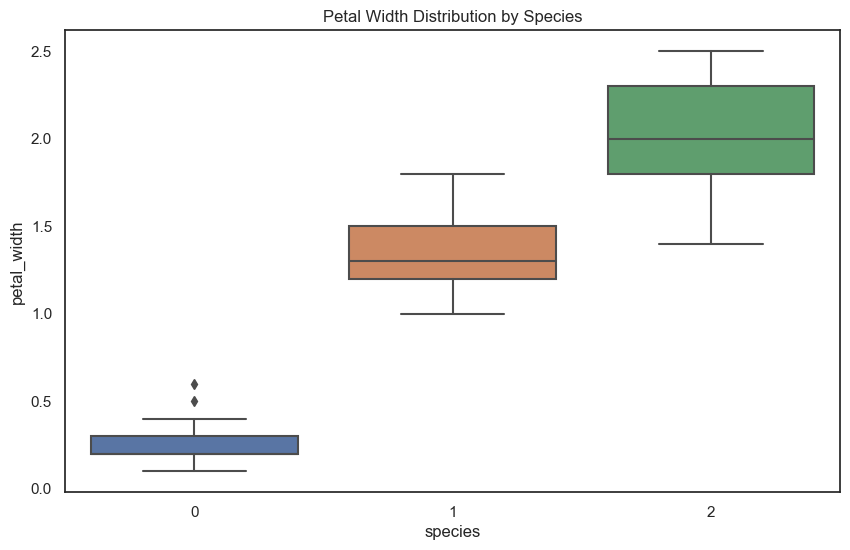

In [24]:
mean_by_species = df_iris.groupby('species').mean()

# Plotting feature importance using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, x='species', y='sepal_length')
plt.title('Sepal Length Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, x='species', y='sepal_width')
plt.title('Sepal Width Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, x='species', y='petal_length')
plt.title('Petal Length Distribution by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, x='species', y='petal_width')
plt.title('Petal Width Distribution by Species')
plt.show()

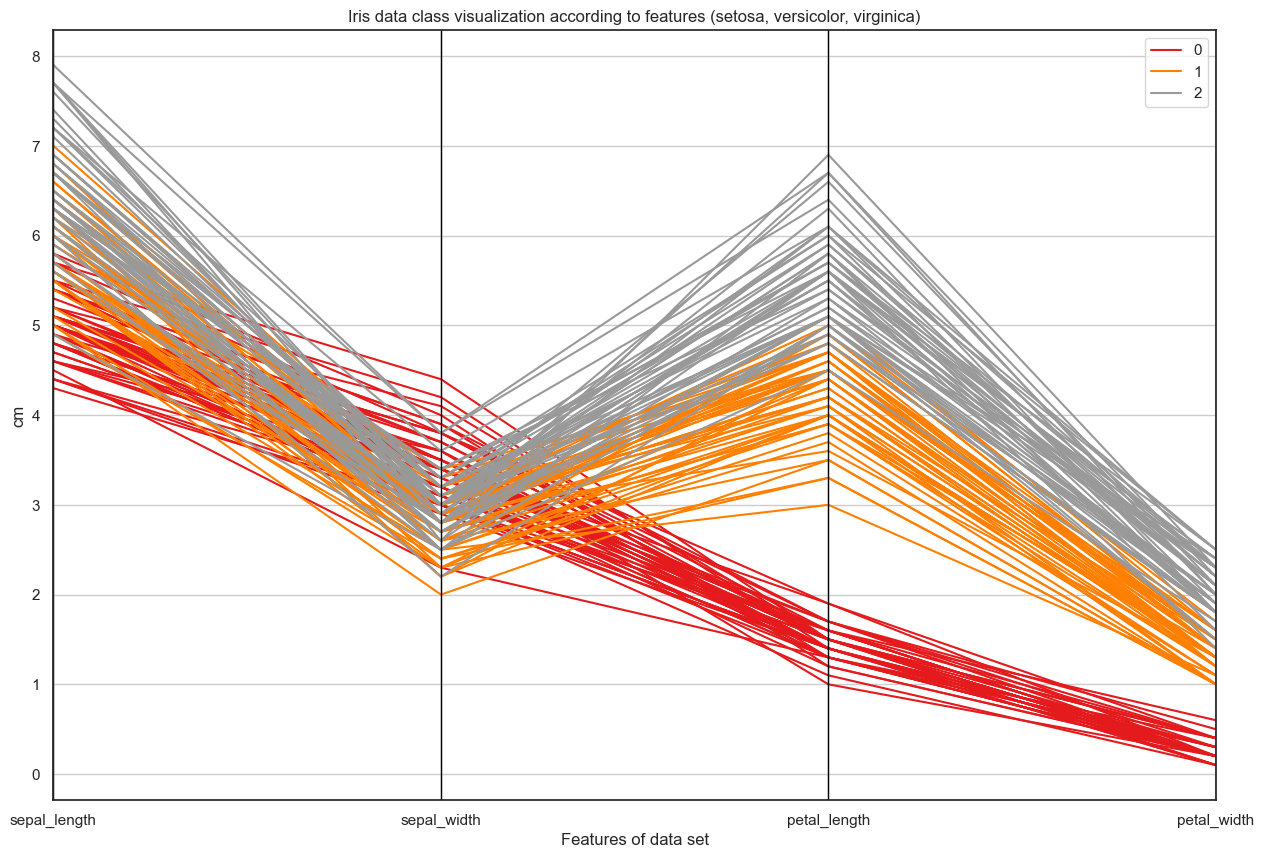

In [32]:
import matplotlib_venn as venn
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df_iris, 'species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

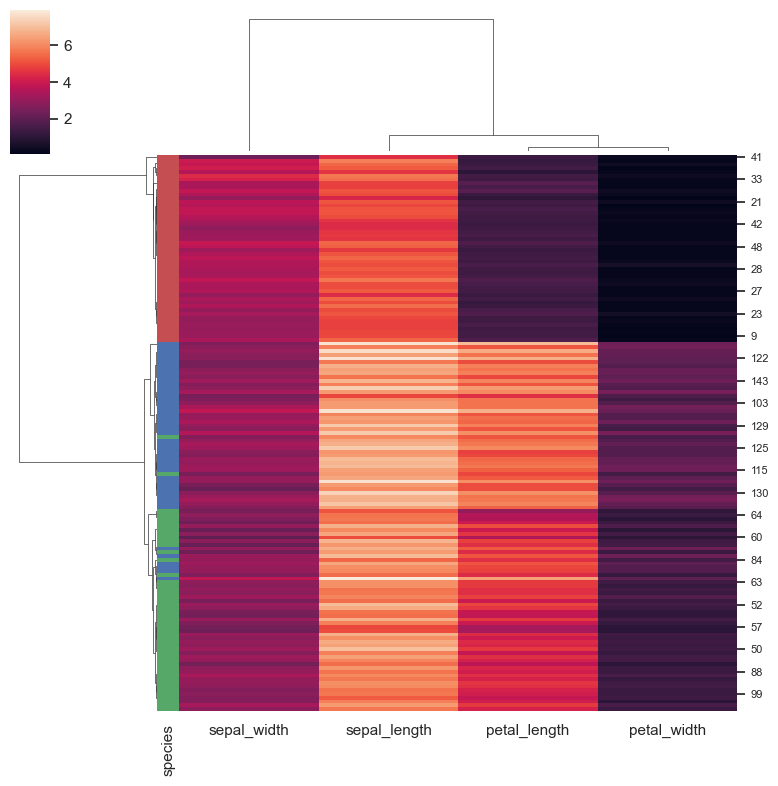

In [35]:
df1 = df_iris.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]]
df2 = df_iris.species
x = dict(zip(df2.unique(),"rgb"))
row_colors = df2.map(x)
cg = sns.clustermap(df1,row_colors=row_colors,figsize=(8, 8),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

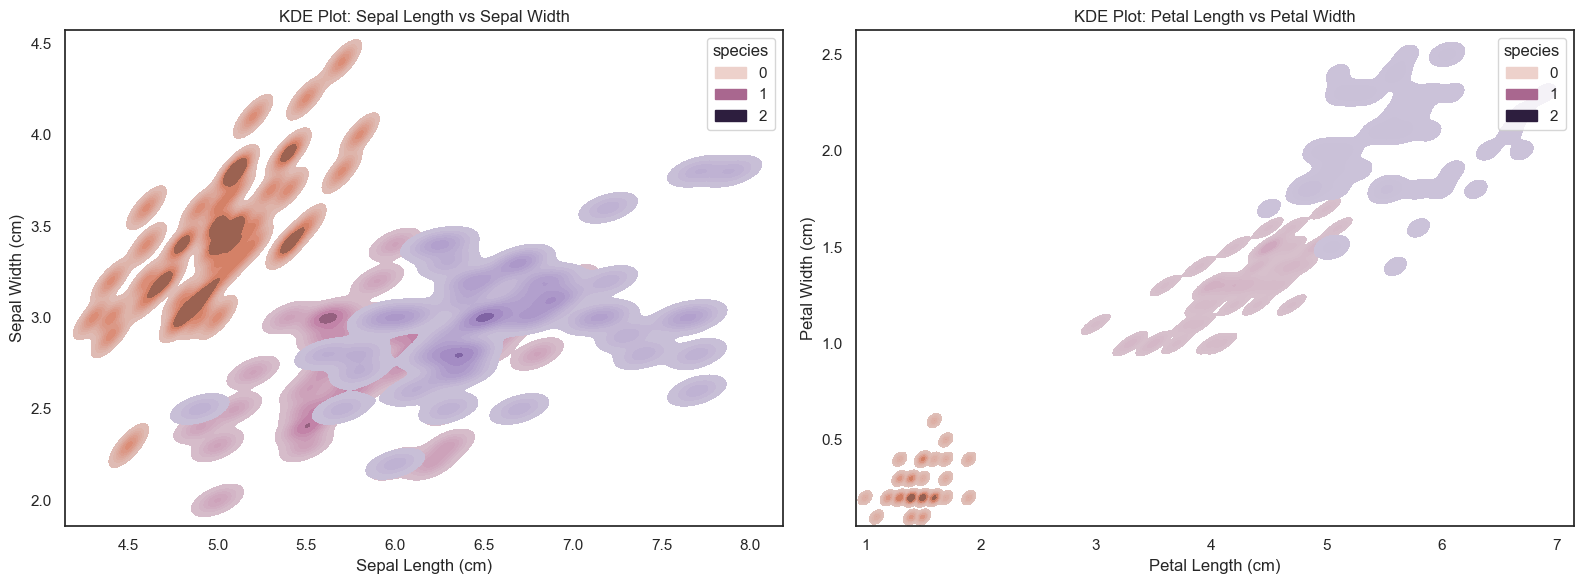

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

sns.kdeplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species', cmap="Reds", shade=True, bw=.15, ax=axes[0])
axes[0].set_title('KDE Plot: Sepal Length vs Sepal Width')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')

sns.kdeplot(data=df_iris, x='petal_length', y='petal_width', hue='species', cmap="Reds", shade=True, bw=.15, ax=axes[1])
axes[1].set_title('KDE Plot: Petal Length vs Petal Width')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

In [67]:
X = df_iris.drop(columns='species')
y = df_iris['species']

In [68]:
X.shape,y.shape

((149, 4), (149,))

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [71]:
X_train.shape,X_test.shape

((111, 4), (38, 4))

In [86]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
12,4.8,3.0,1.4,0.1
66,5.6,3.0,4.5,1.5
143,6.8,3.2,5.9,2.3
32,5.2,4.1,1.5,0.1
67,5.8,2.7,4.1,1.0


In [72]:
y_train.shape,y_test.shape

((111,), (38,))

In [87]:
y_train.head()

12     0
66     1
143    2
32     0
67     1
Name: species, dtype: int32

#### Logistic Regression

In [89]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
print("Accuracy score of Logistic Regression : ",log_model.score(X_test,y_test))

Accuracy score of Logistic Regression :  0.9736842105263158


In [79]:
log_model.fit(X_train.values,y_train.values)

LogisticRegression()

#### Support Vector Machine

In [84]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
prediction=svm_model.predict(X_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 1.0


#### Decision Tree Classifier

In [88]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
prediction=dt_model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9473684210526315


#### KNN Classifier

In [92]:
knn_model=KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train,y_train)
prediction=knn_model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9473684210526315


([<matplotlib.axis.XTick at 0x16a888165f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

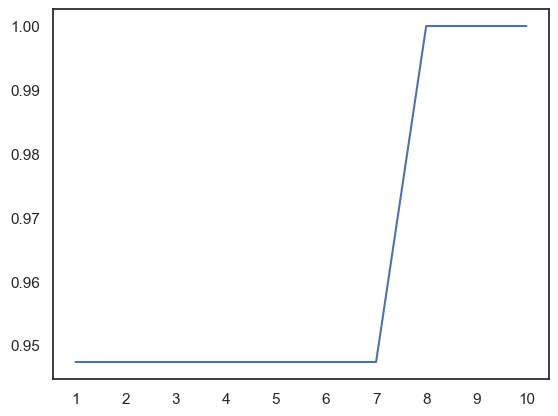

In [93]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    knn_model=KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train,y_train)
    prediction=knn_model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

#### Random Forest Classifier

In [94]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


### Creating Petals And Sepals Training Data

In [96]:
petal=df_iris[['petal_length','petal_width','species']]
sepal=df_iris[['sepal_length','sepal_width','species']]

#### Petal

In [98]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p.species

#### Sepal

In [99]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  
train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s.species

#### SVM

In [100]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 1.0
The accuracy of the SVM using Sepal is: 0.8222222222222222


#### Logistic Regression

In [101]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


#### Decision Tree Classifier

In [102]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 1.0
The accuracy of the Decision Tree using Sepals is: 0.7333333333333333


#### KNN

In [103]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.8


#### Save Best Model as Pickle

In [105]:
filename = 'iris_best_model.sav'
try: 
  with open(filename,'wb')as file:
      pkl.dump(log_model,file)
  print ("Model Saved")
except Exception as e:
    print(f"Error Saving the Model:{e}")

Model Saved


In [107]:
load_model = pkl.load(open(filename,'rb'))

In [110]:
result = load_model.predict([[5.2,1.1,2.0,2.5]])
if result == 0:
    print("setosa")
elif result == 1:
    print("versicolor")
else:
    print("virginca")

versicolor


In [113]:
print(sklearn.__version__)

1.3.2


<span style="color: darkblue; font-weight: bold; font-size: 18px; text-decoration: underline;">Findings :</span>

- [x] Employing Petal characteristics instead of Sepal for data training results in significantly enhanced accuracy.

- [x] This outcome aligns with our anticipation from the heatmap displayed earlier, indicating a notably low correlation between Sepal Width and Length, whereas a notably high correlation exists between Petal Width and Length.